# **Student Task 1 of Mini Project: Text Classification on a Text Dataset using Machine Learning**

In [ ]:
import pandas as pd

# Load the dataset (replace with the actual dataset name)
df = pd.read_csv("NLP Dataset.csv")

# Display the first few rows to understand the structure
df.head()

,INPUT,INTENT
0,I cannot afford purchase {{Order Number}} I ha...,cancel_order
1,"I have bought some item, I have to cancel orde...",cancel_order
2,"I do not want this item, cancel order {{Order ...",cancel_order
3,I need assistance with canceling purchase {{Or...,cancel_order
4,were can i cancel purchase {{Order Number}} I ...,cancel_order


# **Section 2: Perform Exploratory Data Analysis (EDA)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   INPUT   2484 non-null   object
 1   INTENT  2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB
None
                                                    INPUT        INTENT
count                                                2484          2484
unique                                               2475            27
top     updating information on {{Account Category}} a...  cancel_order
freq                                                    2            92


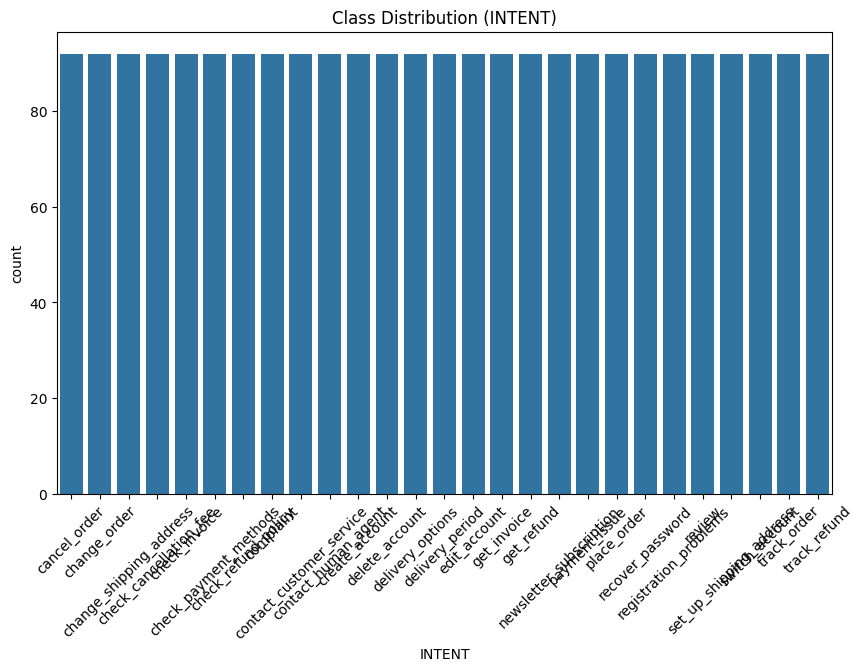

Missing values in each column:
INPUT     0
INTENT    0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display dataset info and summary statistics
print(df.info())
print(df.describe())

# Visualize the class distribution (INTENT column)
plt.figure(figsize=(10, 6))
sns.countplot(x='INTENT', data=df, order=df['INTENT'].value_counts().index)
plt.title("Class Distribution (INTENT)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# **Section 3: Perform Text Processing on Dataset**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphabetic characters and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()

    # Remove stopwords (optional, depending on your use case)
    text = " ".join([word for word in text.split() if word not in stop_words])

    return text

# Apply text cleaning to the INPUT column
df['cleaned_text'] = df['INPUT'].apply(clean_text)

# Display cleaned text alongside the original text
df[['INPUT', 'cleaned_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,INPUT,cleaned_text
0,I cannot afford purchase {{Order Number}} I ha...,cannot afford purchase order number given lot ...
1,"I have bought some item, I have to cancel orde...",bought item cancel order order number due unfo...
2,"I do not want this item, cancel order {{Order ...",want item cancel order order number given lot ...
3,I need assistance with canceling purchase {{Or...,need assistance canceling purchase order numbe...
4,were can i cancel purchase {{Order Number}} I ...,cancel purchase order number facing challenges...



# **Section 4: Generate NLP-Based Features**

In [ ]:
import numpy as np

def generate_nlp_features(df):
    # Character count
    df['char_count'] = df['cleaned_text'].apply(len)

    # Word count
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

    # Average word length
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))

    # Stopword count (optional, depends on whether stopwords were removed earlier)
    df['stopword_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

    # Hashtag count (not relevant for this dataset, but included for completeness)
    df['htag_count'] = df['cleaned_text'].apply(lambda x: x.count('#'))

    return df

# Generate NLP features
df = generate_nlp_features(df)

# Display the first few rows of the generated features
df[['cleaned_text', 'char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].head()


,cleaned_text,char_count,word_count,avg_word_length,stopword_count,htag_count
0,cannot afford purchase order number given lot ...,203,26,6.846154,0,0
1,bought item cancel order order number due unfo...,203,26,6.846154,0,0
2,want item cancel order order number given lot ...,203,27,6.555556,0,0
3,need assistance canceling purchase order numbe...,231,28,7.285714,0,0
4,cancel purchase order number facing challenges...,212,26,7.192308,0,0


# **Section 5: Generate Bag of Words, TFIDF, and FastText Features**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext
import numpy as np

# Bag of Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)  # Limit to 5000 features
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# FastText embeddings (using a pre-trained FastText model)
# Download the FastText model if not already downloaded:


# Load the FastText model
ft_model = fasttext.load_model('cc.en.300.bin')

# Function to generate FastText embeddings for a text
def get_fasttext_embeddings(text):
    words = text.split()
    word_vectors = [ft_model.get_word_vector(word) for word in words]
    return np.mean(word_vectors, axis=0)  # Return the mean vector of all word vectors

# Apply FastText embeddings to the cleaned text
df['fasttext_embeddings'] = df['cleaned_text'].apply(get_fasttext_embeddings)

# Display the first few rows of the generated features
print("Bag of Words (BoW) shape:", X_bow.shape)
print("TF-IDF shape:", X_tfidf.shape)
print("FastText embeddings sample:")
print(df['fasttext_embeddings'].head())

Bag of Words (BoW) shape: (2484, 786)
TF-IDF shape: (2484, 786)
FastText embeddings sample:
0    [-0.011920258, 0.024435755, 0.03400187, 0.0496...
1    [-0.02804447, 0.021972856, 0.036855962, 0.0628...
2    [-0.019014785, 0.02437117, 0.038964454, 0.0556...
3    [-0.022712454, 0.008294691, 0.028492643, 0.055...
4    [-0.025450362, 0.007286676, 0.02429868, 0.0560...
Name: fasttext_embeddings, dtype: object


# **Section 6: Train All Supervised Models on NLP-Based Features**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['INTENT']  # Target column is 'INTENT'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to train
models = {
    "Random Forest NLP Features": RandomForestClassifier(random_state=42),
    "SVM NLP Features": SVC(kernel='linear', random_state=42),
    "Logistic Regression NLP Features": LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print(f"Accuracy for {model_name}: {accuracy:.4f}")

Accuracy for Random Forest NLP Features: 0.0617
Accuracy for SVM NLP Features: 0.0777
Accuracy for Logistic Regression NLP Features: 0.0737


# **Sections 7-9: Train Models on BoW, TFIDF, and FastText Features**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Define the target variable
y = df['INTENT']  # Target column is 'INTENT'

# Dictionary to store trained models
trained_models = {}

# Function to train and evaluate models
def train_and_evaluate(X, y, feature_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    results = {}

    # Define models with feature-specific names
    models = {
        f"Random Forest ({feature_name})": RandomForestClassifier(random_state=42),
        f"SVM ({feature_name})": SVC(kernel='linear', random_state=42),
        f"Logistic Regression ({feature_name})": LogisticRegression(random_state=42, max_iter=1000)
    }

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        # Store results
        results[model_name] = accuracy
        # Store the trained model in the dictionary
        trained_models[model_name] = model
        # Print accuracy
        print(f'{feature_name} Accuracy for {model_name}: {accuracy:.4f}')

    return results

# Example for Bag of Words (BoW)
print("Evaluating BoW Features:")
results_bow = train_and_evaluate(X_bow, y, 'BoW')
print("-" * 60)

# Example for TFIDF
print("Evaluating TFIDF Features:")
results_tfidf = train_and_evaluate(X_tfidf, y, 'TFIDF')
print("-" * 60)

# Example for FastText embeddings
X_fasttext = np.vstack(df['fasttext_embeddings'])
print("Evaluating FastText Features:")
results_fasttext = train_and_evaluate(X_fasttext, y, 'FastText')
print("-" * 60)

Evaluating BoW Features:
BoW Accuracy for Random Forest (BoW): 0.8619
BoW Accuracy for SVM (BoW): 0.9558
BoW Accuracy for Logistic Regression (BoW): 0.9638
------------------------------------------------------------
Evaluating TFIDF Features:
TFIDF Accuracy for Random Forest (TFIDF): 0.8231
TFIDF Accuracy for SVM (TFIDF): 0.9477
TFIDF Accuracy for Logistic Regression (TFIDF): 0.9330
------------------------------------------------------------
Evaluating FastText Features:
FastText Accuracy for Random Forest (FastText): 0.7869
FastText Accuracy for SVM (FastText): 0.0255
FastText Accuracy for Logistic Regression (FastText): 0.1743
------------------------------------------------------------


# **Section 10: Train Models on All Combined Features with TFIDF**

In [ ]:
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the target variable
y = df['INTENT']  # Target column is 'INTENT'

# Define the NLP features (X)
X_nlp = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]

# Combine NLP features and TFIDF features
X_combined = hstack([X_nlp, X_tfidf])  # X_tfidf is already generated in previous steps

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Define models to train
models = {
    "Random Forest Combined": RandomForestClassifier(random_state=42),
    "SVM Combined": SVC(kernel='linear', random_state=42),
    "Logistic Regression Combined": LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Print accuracy
    print(f'Combined Features Accuracy for {model_name}: {accuracy:.4f}')


Combined Features Accuracy for Random Forest Combined: 0.8204
Combined Features Accuracy for SVM Combined: 0.9437
Combined Features Accuracy for Logistic Regression Combined: 0.9115


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Section 11: Save the Model and Make Predictions on Real-World Input**

In [ ]:
import joblib

# Save the trained Logistic Regression BoW model
joblib.dump(trained_models['Logistic Regression (BoW)'], 'logistic_regression_bow_model.pkl')

# Load the model for predictions
loaded_model = joblib.load('logistic_regression_bow_model.pkl')

# Example: Make predictions on real-world input (e.g., a new text)
new_text = ["I want to remove a few items from my order {{Order Number}}. I realized I don’t need them anymore. Can you help me update my purchase?"]

# Assuming you have a function `clean_text` to preprocess the text
new_text_cleaned = [clean_text(text) for text in new_text]

# Assuming you have a `bow_vectorizer` to transform the text into BoW features
new_text_features = bow_vectorizer.transform(new_text_cleaned)

# Predict using the trained model
prediction = loaded_model.predict(new_text_features)
print(f'Prediction for new text: {prediction}')

Prediction for new text: ['change_order']


# **Section 12: Analysis**

The accuracy for each model and feature set is shown below in this table:

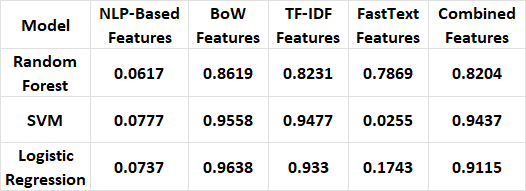
### **Results:**

1. **NLP Features (Basic Features):**
   - **Accuracy:** Very low (6.17% to 7.77%).
   - **Reason:** Basic NLP features (e.g., character count, word count) are not sufficient to capture the semantic meaning of text, which is crucial for intent classification.

2. **BoW Features:**
   - **Accuracy:** High (86.19% to 96.38%).
   - **Reason:** BoW captures word presence and frequency, which is effective for intent classification as it directly represents the input text.

3. **TF-IDF Features:**
   - **Accuracy:** High (82.31% to 94.77%).
   - **Reason:** TF-IDF improves on BoW by weighting words based on importance, reducing the impact of common words and emphasizing unique terms.

4. **FastText Features:**
   - **Accuracy:** Mixed (2.55% to 78.69%).
   - **Reason:** FastText embeddings capture semantic meaning but may struggle with short or domain-specific text. SVM performed poorly, likely due to its sensitivity to high-dimensional embeddings.

5. **Combined Features:**
   - **Accuracy:** High (82.04% to 94.37%).
   - **Reason:** Combining NLP features with TF-IDF adds some value but doesn't significantly outperform TF-IDF alone, as NLP features contribute little.

---

### **Best Performing Feature Set:**
- **BoW and TF-IDF** performed the best, with **Logistic Regression** achieving the highest accuracy (96.38% for BoW and 93.30% for TF-IDF).
- **Why:** BoW and TF-IDF directly represent the text structure, which is critical for intent classification. Logistic Regression works well with these sparse, high-dimensional features.

---

### **Challenges and Findings:**
- **FastText underperformed:** Likely due to the small dataset or lack of fine-tuning for domain-specific embeddings.
- **NLP features were ineffective:** Basic text statistics are insufficient for intent classification.
- **SVM struggled with FastText:** High-dimensional embeddings may not align well with SVM's linear kernel.

---

### **Suggestions for Improvement:**
1. **Try Advanced Models:**
   - Use **BERT** or **GPT-based embeddings** for better semantic understanding.
   - Experiment with **deep learning models** like LSTM or CNN for text classification.

2. **Hyperparameter Tuning:**
   - Optimize hyperparameters for SVM, Random Forest, and Logistic Regression using grid search or Bayesian optimization.

3. **Feature Engineering:**
   - Combine BoW/TF-IDF with FastText embeddings for richer feature representation.
   - Add domain-specific features (e.g., order number detection).